<ipython-input-2-4be611648f4b>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rainfall'].fillna(data['Rainfall'].mean(), inplace=True)  # Replace missing values with mean
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date in

                               SARIMAX Results                                
Dep. Variable:               Rainfall   No. Observations:                16755
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -113676.424
Date:                Wed, 16 Oct 2024   AIC                         227364.849
Time:                        09:05:04   BIC                         227411.207
Sample:                             0   HQIC                        227380.147
                              - 16755                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1719      0.005    -37.260      0.000      -0.181      -0.163
ar.L2         -0.0069      0.005     -1.275      0.202      -0.017       0.004
ar.L3         -0.0621      0.007     -8.962      0.0

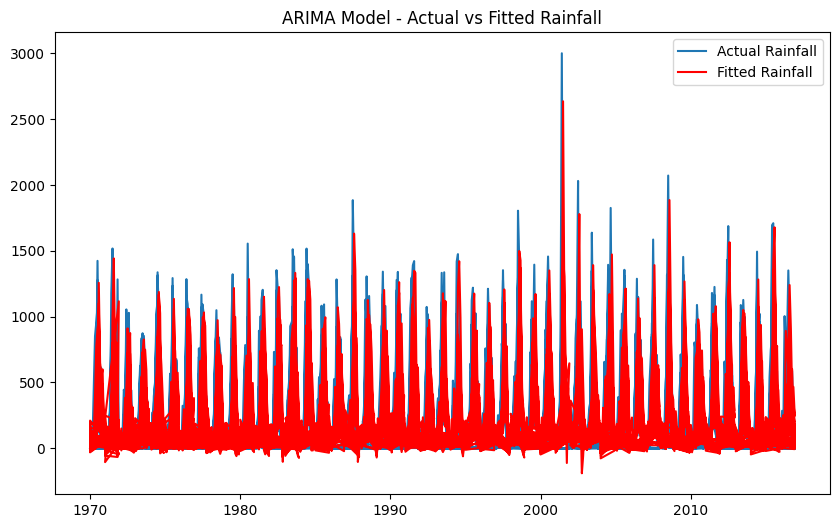

16755    167.772886
16756    267.780571
16757    330.462003
16758    344.270935
16759    319.306919
16760    274.520329
16761    254.190998
16762    246.264717
16763    251.864566
16764    263.457233
16765    272.990610
16766    275.753178
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/data_monthly_rainfall.csv')

# Convert 'Year' and 'Month' to a datetime object
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
data.set_index('Date', inplace=True)

# Check for missing values and handle them if needed
data['Rainfall'].fillna(data['Rainfall'].mean(), inplace=True)  # Replace missing values with mean

# Train ARIMA model (p, d, q) - Set the order based on ACF/PACF plots
model = ARIMA(data['Rainfall'], order=(5, 1, 0))  # Modify p, d, q based on the ACF/PACF analysis
model_fit = model.fit()

# Display model summary
print(model_fit.summary())

# Plot the actual vs fitted values
data['Fitted'] = model_fit.fittedvalues
plt.figure(figsize=(10, 6))
plt.plot(data['Rainfall'], label='Actual Rainfall')
plt.plot(data['Fitted'], color='red', label='Fitted Rainfall')
plt.title('ARIMA Model - Actual vs Fitted Rainfall')
plt.legend()
plt.show()

# Forecasting future values
forecast = model_fit.forecast(steps=12)  # Forecast for the next 12 months
print(forecast)
